# New Section

- To Write a neural network that can:
  * take 2 inputs:
  * an image from MNIST dataset, and
  * a random number between 0 and 9
- and gives three outputs:
  * the **number** that was represented by the MNIST image, and
  * the **sum** & **difference** of this number (predicted) with the random number that was generated and sent as the input to the network
  

## Importing Libraries

In [ ]:
#importing the required libraries
import torch
import torchvision  # provide access to datasets, models, transforms, utils, etc
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torchsummary import summary
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt 

## Downloading the data


In [ ]:
# For training set 
train_set = torchvision.datasets.MNIST(
    root = './data', #creating directory and giving the path
    train = True, # as we are downloading the training set
    download = True,# True id the data is not present/available in local storage
    transform = transforms.Compose([
          transforms.ToTensor(), # converting image to tensor
          transforms.Normalize((0.1307,),(0.3081,)) #Normalizing the image with mean and std deviation
    ])
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
# For test set 
test_set = torchvision.datasets.MNIST(
    root = './data', #creating directory and giving the path
    train = False, # as we are downloading the training set
    download = True,# True id the data is not present/available in local storage
    transform = transforms.Compose([
          transforms.ToTensor(), # converting image to tensor
          transforms.Normalize((0.1307,),(0.3081,)) #Normalizing the image with mean and std deviation
    ])
)

Definig a dataset class


In [ ]:
# defining a class Project 

class Project(Dataset):
  def __init__(self, data):
    self.data = data
    self.rand_num = torch.randint(0,10,(len(data),1), dtype =torch.float)
  
  def __getitem__(self, index):
    image, label = self.data[index]
    num = self.rand_num[index]

    sum = num + label
    diff = abs(num - label)
    return image, num, label, sum, diff
  
  def __len__(self):
    return len(self.data)

## Getting the data

In [ ]:
# enabling the GPU
torch.manual_seed(1)
batch_size = 256
use_cuda = torch.cuda.is_available() # assigning it to variable
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else{}


In [ ]:
#To create a iterable object with dataloader
train_loader = torch.utils.data.DataLoader(
    Project(train_set), batch_size=batch_size, shuffle=True, **kwargs
)
test_loader = torch.utils.data.DataLoader(
    Project(test_set), batch_size=batch_size, shuffle=True, **kwargs
)

In [ ]:
len(next(iter(train_loader)))

5

In [ ]:
next(iter(train_loader))[0].shape, next(iter(train_loader))[1].shape, next(iter(train_loader))[2].shape

(torch.Size([256, 1, 28, 28]), torch.Size([256, 1]), torch.Size([256]))

## Visualising the data


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


labels: tensor([3, 5, 3, 6, 6, 4, 9, 0, 8, 2, 5, 5, 2, 0, 1, 9, 9, 9, 9, 4, 2, 4, 3, 8,
        7, 8, 2, 8, 1, 7, 8, 1, 4, 7, 4, 1, 5, 4, 5, 2, 2, 2, 3, 1, 0, 0, 7, 8,
        7, 2, 7, 3, 6, 2, 9, 8, 0, 9, 2, 2, 6, 0, 4, 2, 9, 8, 1, 4, 6, 1, 9, 2,
        8, 0, 6, 7, 9, 2, 8, 7, 7, 9, 8, 3, 1, 1, 9, 4, 7, 1, 6, 8, 1, 6, 1, 1,
        0, 4, 4, 0, 7, 6, 7, 1, 1, 1, 4, 4, 1, 4, 5, 4, 5, 0, 5, 1, 2, 6, 5, 1,
        7, 1, 3, 1, 8, 8, 6, 5, 5, 7, 4, 4, 7, 6, 9, 8, 6, 6, 1, 8, 0, 2, 2, 0,
        0, 0, 4, 7, 0, 1, 8, 6, 4, 4, 7, 7, 9, 8, 2, 1, 6, 9, 2, 8, 3, 1, 0, 9,
        9, 5, 2, 4, 0, 7, 2, 3, 5, 8, 5, 1, 6, 9, 4, 3, 7, 7, 1, 1, 0, 3, 8, 5,
        6, 9, 5, 1, 4, 6, 1, 1, 7, 9, 6, 3, 3, 6, 6, 9, 8, 8, 7, 1, 2, 8, 4, 4,
        5, 4, 7, 0, 6, 8, 2, 0, 9, 8, 4, 7, 7, 6, 5, 5, 1, 1, 7, 9, 8, 2, 7, 9,
        3, 0, 7, 8, 6, 9, 0, 6, 1, 4, 5, 9, 0, 4, 3, 9])


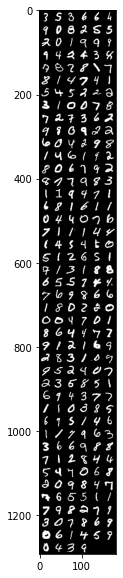

In [ ]:
image, num, label, sum, diff = next(iter(train_loader)) # Assingning the data with appropriate names by reading the data
# visualising the images and labels
grid = torchvision.utils.make_grid(image, nrow=6 )
plt.figure(figsize=(15,10))
plt.imshow(np.transpose(grid, (1,2,0)));
print('labels:', label)

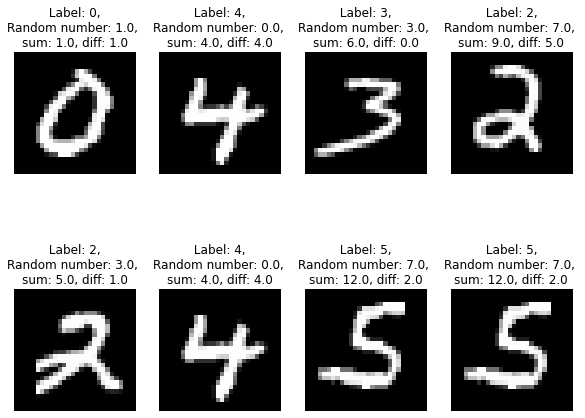

In [ ]:
# Visualising the entire dataset with the sum, difference
cols, rows = 4,2
figure = plt.figure(figsize = (10,8))
for i in range(1,cols*rows +1): # for loop for number of elements in the final output
  k = np.random.randint(0,batch_size) # to generate a random number within the batch_size

  figure.add_subplot(rows, cols, i) # adding subplot for each image
  plt.title(f" Label: {label[k].item()}, \nRandom number: {num[k].item()}, \nsum: {sum[k].item()}, diff: {diff[k].item()}")
  plt.imshow(image[k].squeeze(), cmap = 'gray')
  plt.axis('off')


## Defining the Network


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1) #input 28*28*1, kernel size -3*3*1, no of kernels 32,  OUtput 28*28*32 LRF =3 GRF =5
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)#input 28*28*32, kernel size -3*3*32, no of kernels 64,  OUtput 28*28*64 LRF =3 GRF =7
        self.pool1 = nn.MaxPool2d(2, 2)#input 28*28*64, kernel size -2*2, no of kernels 64, OUtput 14*14*64 LRF =2 GRF =14
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)#input 14*14*64, kernel size -3*3*64, no of kernels 128,  OUtput 14*14*128,lRF =3 GRF = 16
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)#input 14*14*128, kernel size -3*3*128, no of kernels 256,  OUtput 14*14*256, LRF =3 GRF =18
        self.pool2 = nn.MaxPool2d(2, 2)#input 14*14*256, kernel size -2*2, no of kernels 256, OUtput 7*7*256 LRF =3 GRF =36
        self.conv5 = nn.Conv2d(256, 512, 3)#input 7*7*256, kernel size -3*3*256, no of kernels 512 ,OUtput 5*5*512 LRF =3 GRF =38
        self.conv6 = nn.Conv2d(512, 1024, 3)#input 5*5*512, kernel size -3*3*512, no of kernels 1024 ,OUtput3*3*1024 LRF =3 GRF =40
        self.conv7 = nn.Conv2d(1024, 10, 3)#input 3*3*1024, kernel size -3*3*1024, no of kernels 10 ,OUtput1*1*10 LRF =3 GRF =42

        self.dense1 = nn.Linear(1,16)
        self.dense2 = nn.Linear(16,32)
        
        #sum
        self.sum1 = nn.Linear(10+32,64)
        self.sum2 = nn.Linear(64,128)
        self.sum3 = nn.Linear(128,1)

        #diff
        self.diff1 = nn.Linear(10+32,64)
        self.diff2 = nn.Linear(64,128)
        self.diff3 = nn.Linear(128,1)

    def forward(self, x, num):# calling defined objects through forward function.
        x = self.pool1(F.relu(self.conv2(F.relu(self.conv1(x))))) # 1 convolutional block
        x = self.pool2(F.relu(self.conv4(F.relu(self.conv3(x)))))
        x = F.relu(self.conv6(F.relu(self.conv5(x))))
        x = self.conv7(x)
        x = x.view(-1, 10)# Flattening of the 1*1*10 matrix 

        num = F.relu(self.dense1(num))
        num = F.relu(self.dense2(num))
        num = torch.cat((x,num), dim =1)
        #sum processor
        out_sum = F.relu(self.sum1(num))
        out_sum = F.relu(self.sum2(out_sum))
        out_sum = self.sum3(out_sum)

        #diff processor
        out_diff = F.relu(self.diff1(num))
        out_diff = F.relu(self.diff2(out_diff))
        out_diff = self.diff3(out_diff)

        return x, out_sum, out_diff 

In [ ]:
model = Net()
print(model)


Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (conv6): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1))
  (conv7): Conv2d(1024, 10, kernel_size=(3, 3), stride=(1, 1))
  (dense1): Linear(in_features=1, out_features=16, bias=True)
  (dense2): Linear(in_features=16, out_features=32, bias=True)
  (sum1): Linear(in_features=42, out_features=64, bias=True)
  (sum2): Linear(in_features=64, out_features=128, bias=True)
  (sum3): Linear(in_features=128, out_features=1, bias=True)
  (diff1): Lin

In [ ]:
model(torch.rand(1,28,28).unsqueeze(0),torch.randint(2,4,(1,1),dtype = torch.float))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


(tensor([[-0.0023,  0.0176,  0.0034,  0.0014,  0.0013, -0.0020,  0.0076, -0.0032,
          -0.0105, -0.0201]], grad_fn=<ViewBackward>),
 tensor([[0.0247]], grad_fn=<AddmmBackward>),
 tensor([[-0.0436]], grad_fn=<AddmmBackward>))

## Trainig the model


In [ ]:
device = torch.device("cuda" if use_cuda else "cpu")# Assigning the device

In [ ]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    pbar = tqdm(train_loader)
    for batch_idx, (images, nums, labels, sums, diffs) in enumerate(pbar):
        images, nums, labels, sums, diffs = images.to(device), nums.to(device), labels.to(device), sums.to(device), diffs.to(device)
        optimizer.zero_grad()
        label, sum, diff = model(images, nums)

        loss1 = F.nll_loss(F.softmax(label,dim =1), labels)
        loss2 = F.mse_loss(sum,sums)
        loss3 = F.mse_loss(diff,diffs)

        loss = loss1 + loss2 + loss3
        loss.backward()
        optimizer.step()
        pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx}')


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for images, nums, labels, sums, diffs in test_loader:
            images, nums, labels, sums, diffs = images.to(device), nums.to(device), labels.to(device), sums.to(device), diffs.to(device)
            label, sum, diff = model(images, nums)

            loss1 = F.nll_loss(F.softmax(label), labels, reduction='sum')
            loss2 = F.mse_loss(sum,sums, reduction='sum')
            loss3 = F.mse_loss(diff,diffs, reduction='sum')
            loss = loss1 + loss2 +loss3

            test_loss += loss.item()  # sum up batch loss
            pred = label.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(labels.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, 20):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

loss=8.455050468444824 batch_id=234: 100%|██████████| 235/235 [22:08<00:00,  5.65s/it]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


KeyboardInterrupt: ignored

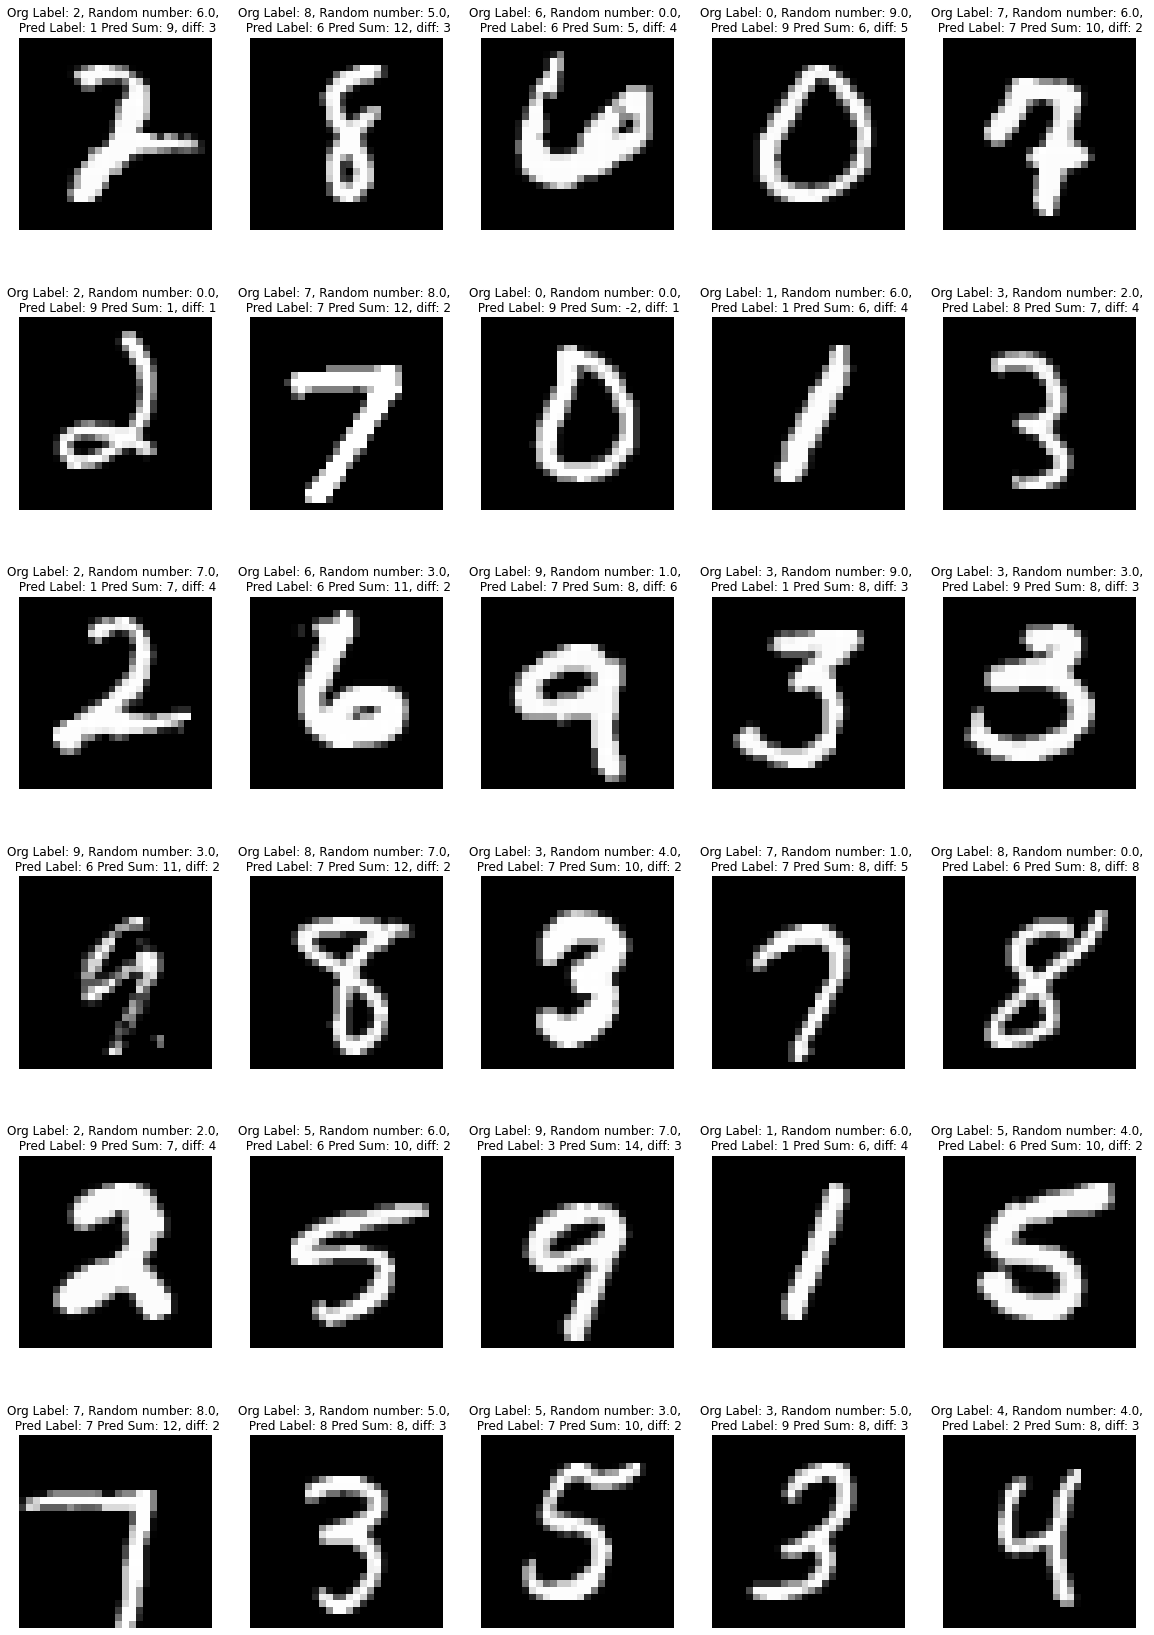

In [ ]:
#Visualising the entire dataset with the sum, difference

cols, rows = 5,6
figure = plt.figure(figsize = (cols*4,rows*5))
for i in range(1,cols*rows +1): # for loop for number of elements in the final output
  num = torch.randint(0,10, (1,1), dtype=torch.float) # to generate a random number within the batch_size
  j = np.random.randint(0, len(test_set))
  image,label = test_set[j]

  pred_lab, pred_sum, pred_diff = model(image.unsqueeze(0), num)

  figure.add_subplot(rows, cols, i) # adding subplot for each image
  plt.title(
      "Org Label: {}, Random number: {}, \n Pred Label: {} Pred Sum: {}, diff: {}".format(
          label, num.item(), pred_lab.argmax().item(), 
          int(round(pred_sum.item(), 0)), int(round(pred_diff.item(), 0))
      )
  )
  plt.imshow(image.squeeze(), cmap = 'gray')
  plt.axis('off')